# BREAST CANCER DETECTION WITH DIFFERENT ML ALGORITHMS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   ### Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### Loading breast cancer data

In [ ]:
DATASET=pd.read_csv('/content/drive/MyDrive/Datasets/breast_cancer/BreastCDataset.csv')

### Exploratory Data Analysis

In [ ]:
DATASET.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [ ]:
DATASET.shape

(569, 32)

In [ ]:
list(DATASET.columns)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
DATASET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
DATASET.iloc[:,1:].describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
DATASET.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [ ]:
DATASET['diagnosis'].unique()

array(['M', 'B'], dtype=object)

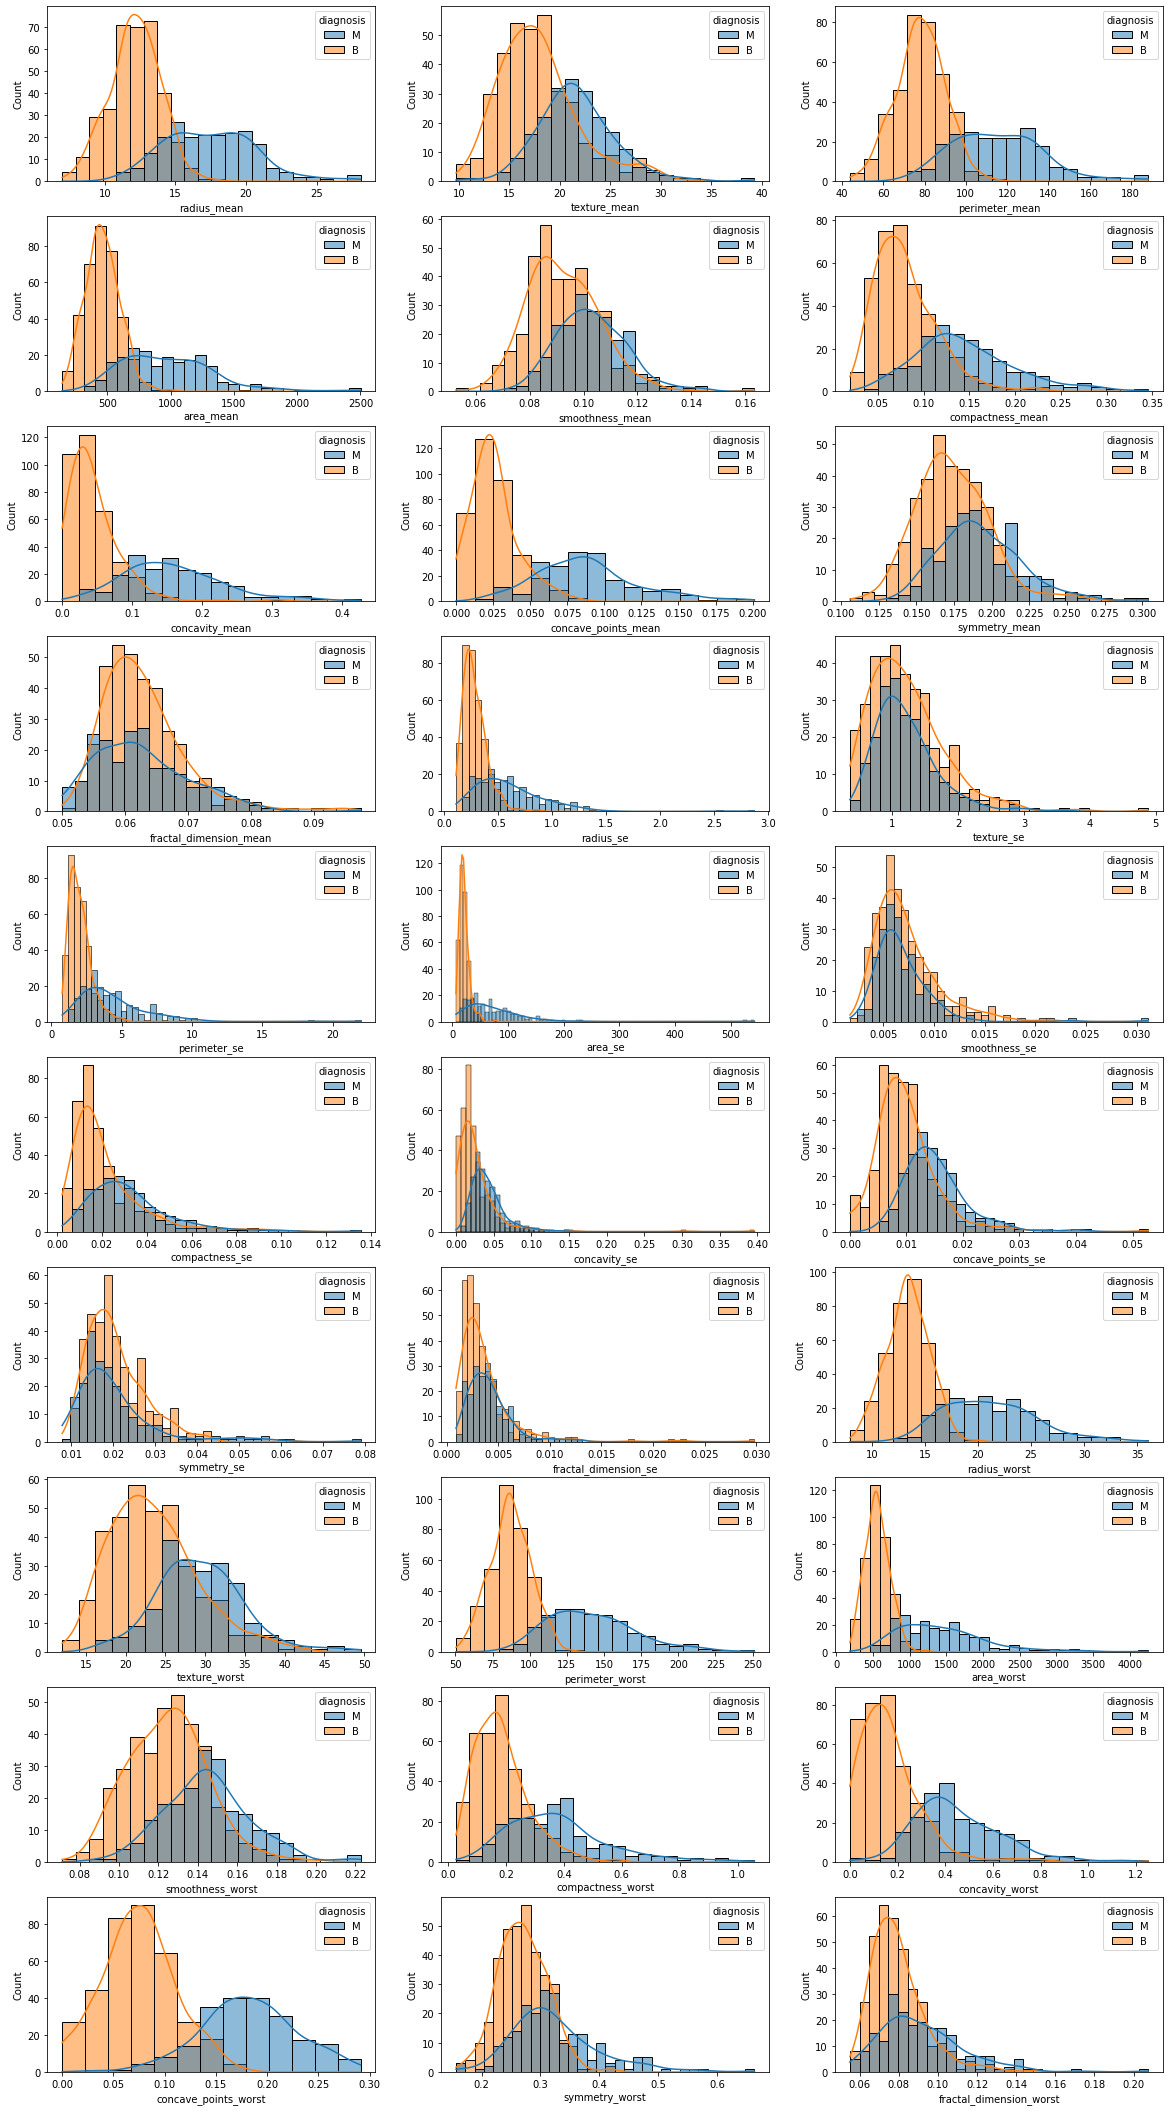

In [ ]:
p=0
fig = plt.figure(figsize=(20,38))
for i in DATASET.columns[2:]:
    p+=1
    plt.subplot(10, 3, p )
    sns.histplot(data=DATASET,x=i,hue='diagnosis',kde=True)
plt.show()


In [ ]:
corr=DATASET.iloc[:,1:].corr()
pd.DataFrame(corr.unstack().sort_values().drop_duplicates()).head(13)

0
fractal_dimension_mean radius_mean            -0.311631
                       area_mean              -0.283110
perimeter_mean         fractal_dimension_mean -0.261477
fractal_dimension_mean radius_worst           -0.253691
area_worst             fractal_dimension_mean -0.231854
smoothness_se          radius_worst           -0.230691
radius_mean            smoothness_se          -0.222600
smoothness_se          perimeter_worst        -0.217304
fractal_dimension_mean perimeter_worst        -0.205151
smoothness_se          perimeter_mean         -0.202694
                       area_worst             -0.182195
area_mean              smoothness_se          -0.166777
texture_se             symmetry_worst         -0.128215

### Feature Engineering

In [ ]:
DF=DATASET.copy()

#### Handling Imbalanced Dataset

In [ ]:
fig = px.histogram(DF, x='diagnosis',color = 'diagnosis',text_auto=True,
                   labels={"target": "DIAGNOSIS"},
                   title='Diagnosis Value Count')
fig.update_layout(bargap=0.6, xaxis_title="DIAGNOSIS",yaxis_title="Number of cases")
fig.show(renderer="colab")

In [ ]:
ros=RandomOverSampler(random_state=42, sampling_strategy=0.77)
new_features,new_target=ros.fit_resample(DF.loc[:,DF.columns!='diagnosis'],DF['diagnosis'])
DF=pd.concat([new_features,new_target],axis=1)

In [ ]:
fig2 = px.histogram(DF, x='diagnosis',color = 'diagnosis',text_auto=True,
                   labels={"target": "DIAGNOSIS"},
                   title='Diagnosis Value Count')
fig2.update_layout(bargap=0.6, xaxis_title="DIAGNOSIS",yaxis_title="Number of cases")
fig2.show(renderer="colab")

#### Handling missing values

In [ ]:
DF.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

#### Encoding Categorical Variables

In [ ]:
DF.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

In [ ]:
DF['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
626    M
627    M
628    M
629    M
630    M
Name: diagnosis, Length: 631, dtype: object

In [ ]:
le=LabelEncoder()
DF['diagnosis']=pd.DataFrame(le.fit_transform(DF['diagnosis']))

DF['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
626    1
627    1
628    1
629    1
630    1
Name: diagnosis, Length: 631, dtype: int64

#### Feature Selection

In [ ]:
DF

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,86135501,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,...,29.25,108.40,808.9,0.1306,0.1976,0.3349,0.1225,0.3020,0.06846,1
627,846381,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.1119,0.2809,0.06287,1
628,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1
629,87163,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,...,29.87,116.60,993.6,0.1401,0.1546,0.2644,0.1160,0.2884,0.07371,1


In [ ]:
DF.drop('id',axis=1,inplace=True)
DF

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,...,29.25,108.40,808.9,0.1306,0.1976,0.3349,0.1225,0.3020,0.06846,1
627,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.1119,0.2809,0.06287,1
628,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1
629,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,0.05671,...,29.87,116.60,993.6,0.1401,0.1546,0.2644,0.1160,0.2884,0.07371,1


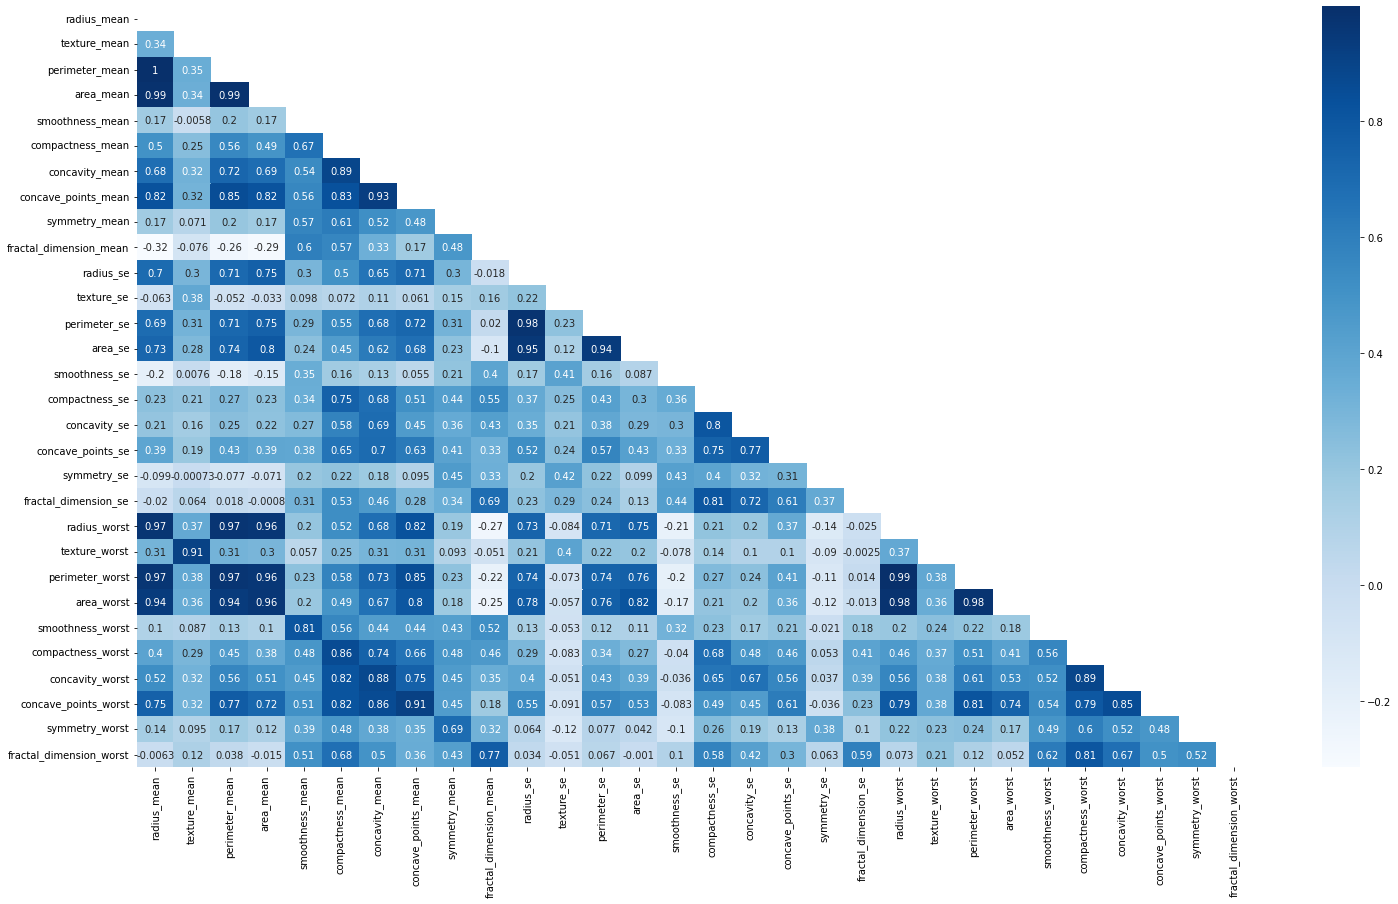

In [ ]:

corr=DF.iloc[:,:30].corr()
plt.figure(figsize=(25,14))
sns.heatmap(corr,annot=True,cmap='Blues',mask=np.triu(corr))

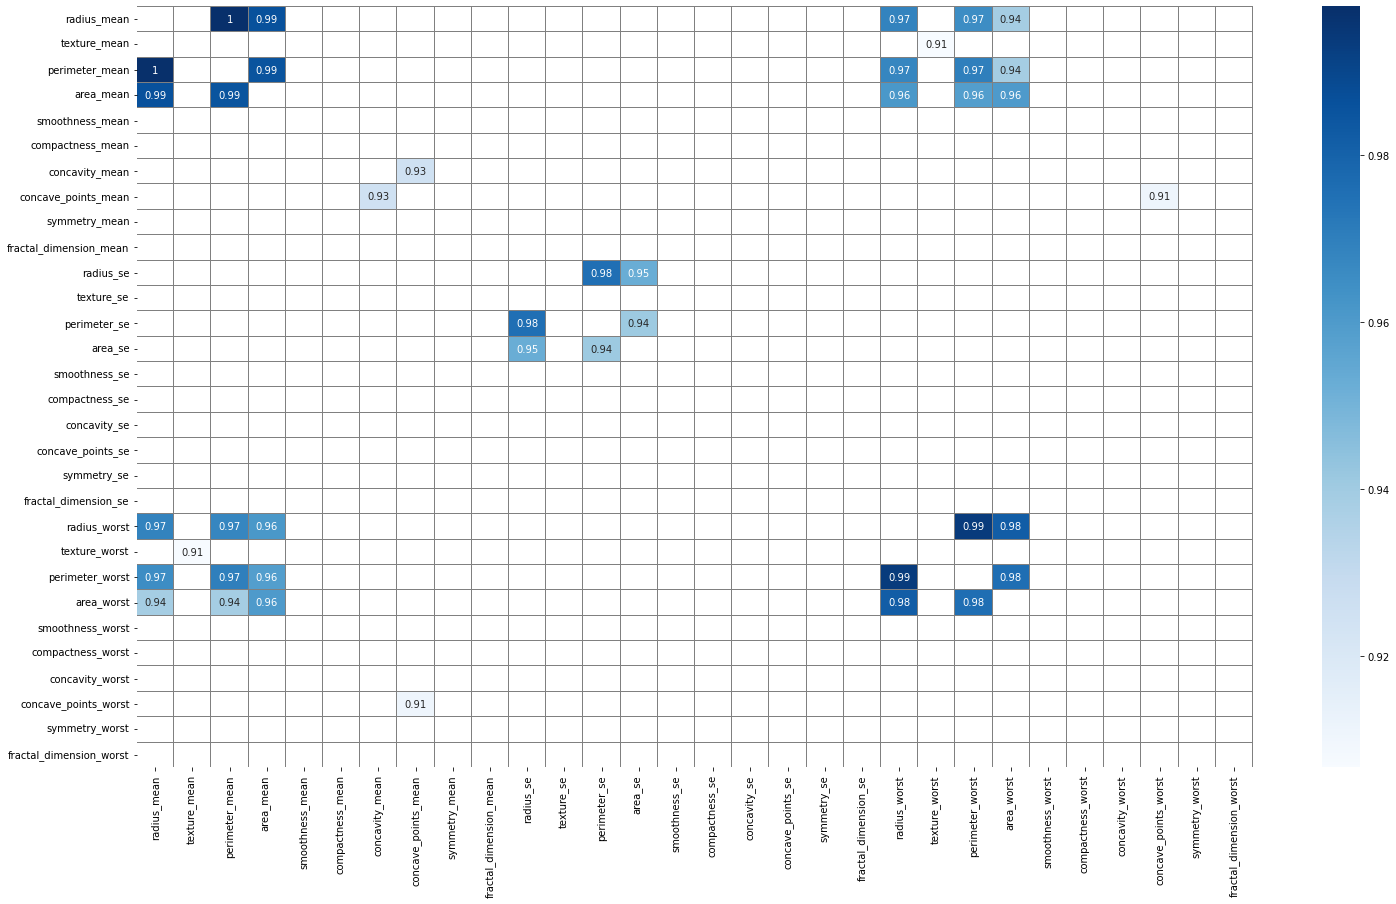

In [ ]:
filtr=(corr>=0.9) & (corr!=1.0)
plt.figure(figsize=(25,14))
sns.heatmap(corr[filtr],annot=True,cmap='Blues',linewidths=0.02, linecolor='grey')

In [ ]:
DF.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [ ]:
drop_columns=['area_mean','perimeter_mean','concave_points_mean','perimeter_se', 'area_se','perimeter_worst','radius_worst',
              'texture_worst','area_worst']
DF.drop(drop_columns,axis=1,inplace=True)

In [ ]:

DF

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,...,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,...,0.015870,0.03003,0.006193,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.013400,0.01389,0.003532,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.020580,0.02250,0.004571,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.018670,0.05963,0.009208,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.018850,0.01756,0.005115,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,14.48,21.46,0.09444,0.09947,0.12040,0.2075,0.05636,0.4204,2.2200,0.009369,...,0.017610,0.02418,0.003249,0.1306,0.1976,0.3349,0.1225,0.3020,0.06846,1
627,15.85,23.95,0.08401,0.10020,0.09938,0.1847,0.05338,0.4033,1.0780,0.009769,...,0.019920,0.02981,0.003002,0.1131,0.1924,0.2322,0.1119,0.2809,0.06287,1
628,13.00,21.82,0.12730,0.19320,0.18590,0.2350,0.07389,0.3063,1.0020,0.005731,...,0.012260,0.02143,0.003749,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1
629,13.43,19.63,0.09048,0.06288,0.05858,0.1598,0.05671,0.4697,1.1470,0.006003,...,0.009443,0.01520,0.001868,0.1401,0.1546,0.2644,0.1160,0.2884,0.07371,1


#### Dealing with outliers

In [ ]:
dct={}
for i in DF.columns[:21]:
    dct[i]=[]
    quantile1,quantile2=np.percentile(DF[i],(25,75))
    iqr=(quantile2-quantile1)
    limit1=quantile1-1.5*iqr
    limit2=quantile2+1.5*iqr
    for j in range(len(DF[i])):
        if (DF[i].iloc[j]<limit1) or (DF[i].iloc[j]>limit2):
            dct[i].append(DF[i].iloc[j])       
for i,j in dct.items():
    print(i)
    print(round(100*len(j)/DF.shape[0],2))

radius_mean
1.9
texture_mean
1.11
smoothness_mean
1.58
compactness_mean
2.69
concavity_mean
3.01
symmetry_mean
2.69
fractal_dimension_mean
2.54
radius_se
6.34
texture_se
3.8
smoothness_se
4.91
compactness_se
4.44
concavity_se
3.65
concave_points_se
2.38
symmetry_se
4.6
fractal_dimension_se
5.55
smoothness_worst
1.43
compactness_worst
2.85
concavity_worst
1.74
concave_points_worst
0.0
symmetry_worst
4.28
fractal_dimension_worst
3.96


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

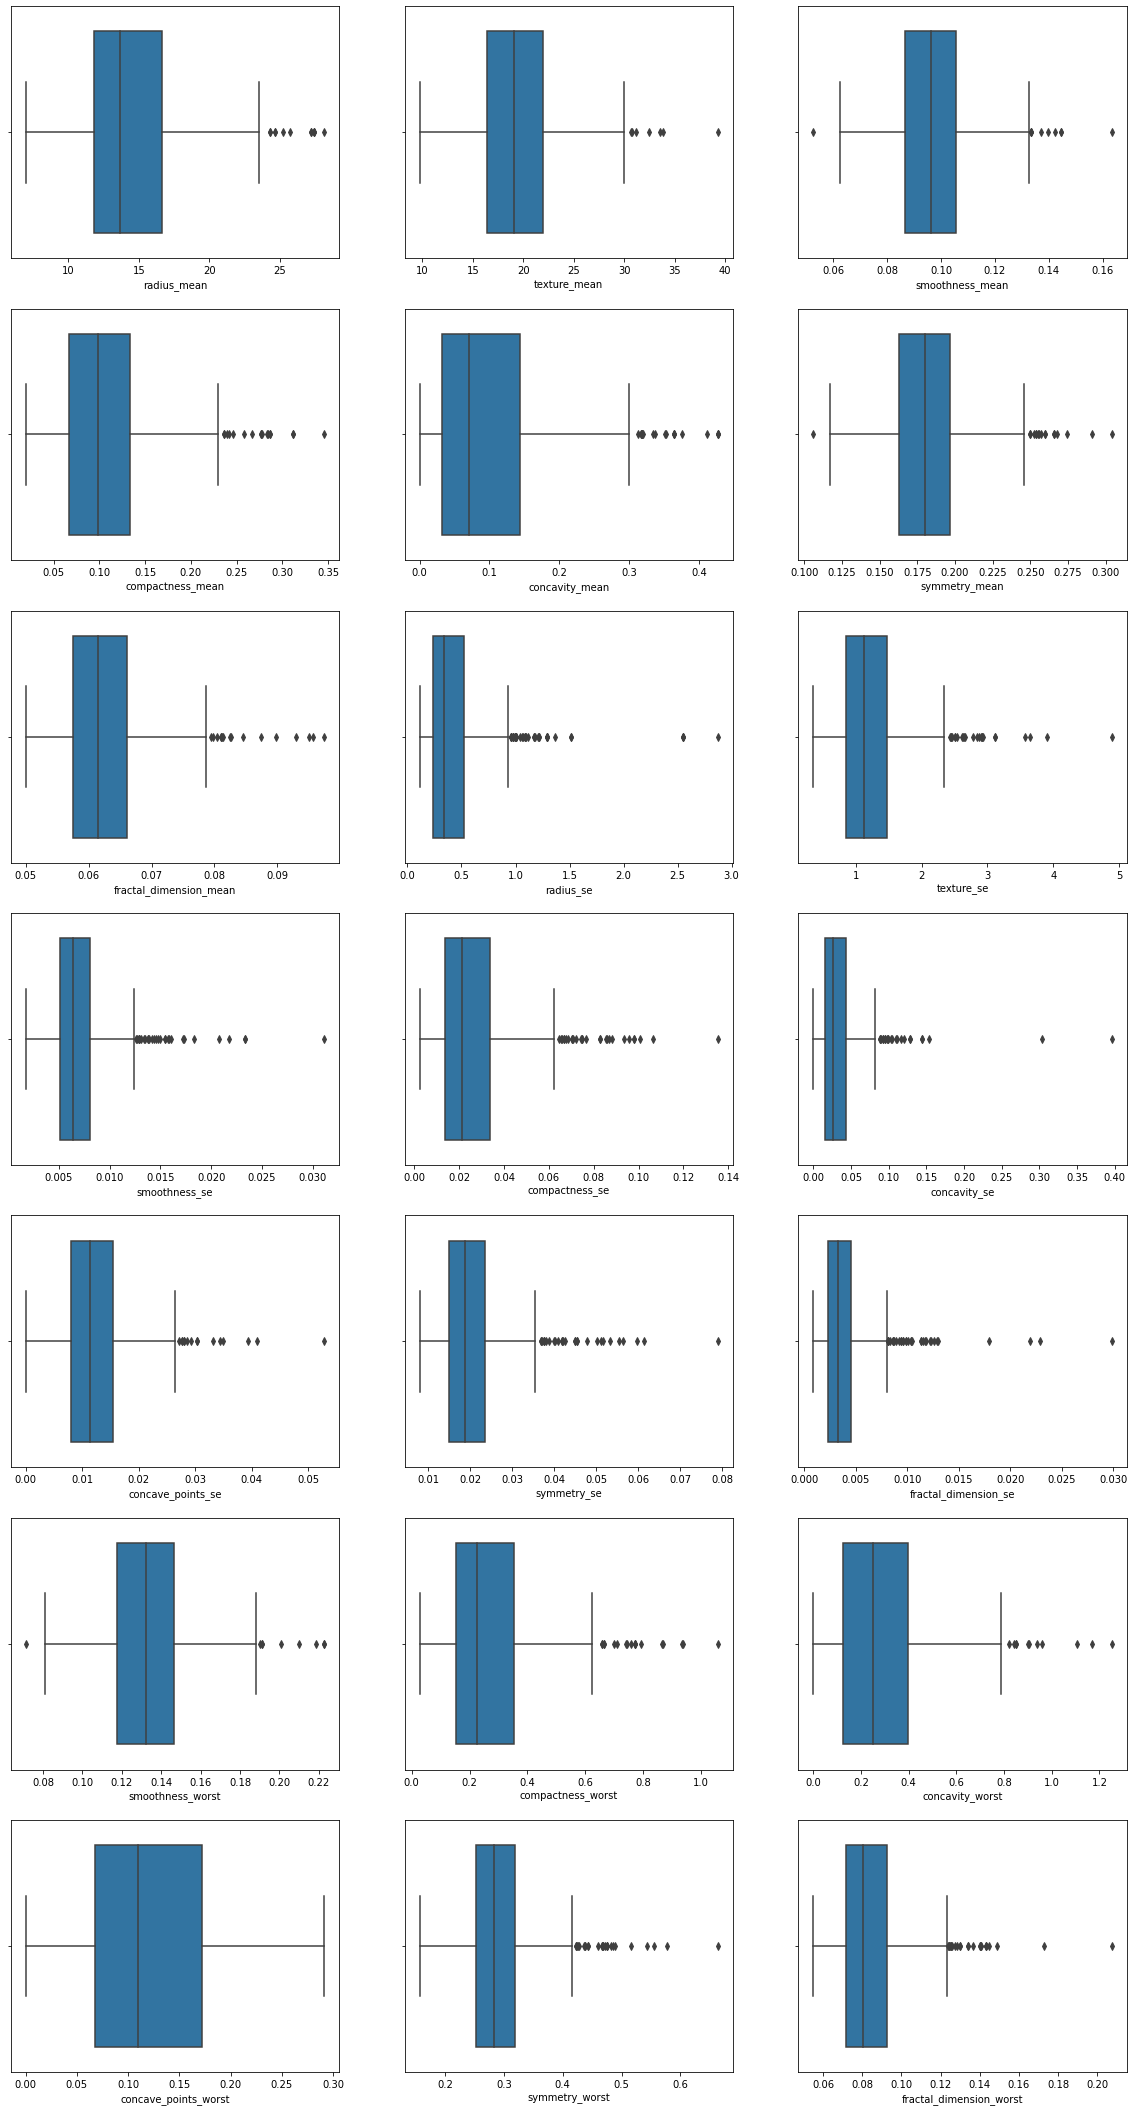

In [ ]:
p=0
fig, axs = plt.subplots(7, 3,figsize=(20, 38))
for i in DF.columns[:21]:
    p+=1
    plt.subplot(7, 3, p )
    sns.boxplot(DF[i])
plt.show()

In [ ]:
for i in DF.columns[:21]:
    quantile1,quantile2=np.percentile(DF[i],(25,75))
    iqr=(quantile2-quantile1)
    limit1=quantile1-1.5*iqr
    limit2=quantile2+1.5*iqr
    for j in range(len(DF[i])):
        if DF[i].iloc[j]<limit1:
            DF[i].iloc[j]=limit1
        elif DF[i].iloc[j]>limit2:
            DF[i].iloc[j]=limit2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in DF.columns[:21]:
    fig = px.histogram(DF, 
                   x=i, 
                   marginal='box', 
                   text_auto=True,
                   color_discrete_sequence  = ['darkgreen'],
                   template='plotly',
                   title=i.upper() + ' Histogram')

    fig.update_layout(xaxis_title=i,yaxis_title="Count", bargap=0.3)
    
    fig.show(renderer="colab")


### Model Selection

In [ ]:
X=DF.iloc[:,:21]
y=DF['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2,shuffle=True)

In [ ]:
from sklearn.svm import SVC

LogReg=LogisticRegression(solver='liblinear', random_state=6)
KNN=KNeighborsClassifier(n_neighbors = 5)
SVC=SVC(kernel = 'linear', random_state = 6)
GNB=GaussianNB()
DecTr=DecisionTreeClassifier(random_state=6)
RanFor=RandomForestClassifier(n_estimators = 100 , random_state = 6)
XGB=xgb.XGBClassifier(n_estimators=100, random_state=6)

models=[LogReg,KNN,SVC,GNB,DecTr,RanFor,XGB]
accro=['LogReg','KNN','SVC','GNB','DecTr','RanFor','XGB']
Models=dict(zip(accro, models))
Models

{'LogReg': LogisticRegression(random_state=6, solver='liblinear'),
 'KNN': KNeighborsClassifier(),
 'SVC': SVC(kernel='linear', random_state=6),
 'GNB': GaussianNB(),
 'DecTr': DecisionTreeClassifier(random_state=6),
 'RanFor': RandomForestClassifier(random_state=6),
 'XGB': XGBClassifier(random_state=6)}

In [ ]:
SS=StandardScaler()
def models_try(Models, X_train, y_train):
    
    
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
    list_scores = {}
    flag=True
    for train_index, val_index in skf.split(X_train, y_train):
        
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        for name,model in Models.items():
            
            Xtrainf, Xvalf, ytrainf, yvalf= X_train_fold, X_val_fold, y_train_fold, y_val_fold
            
            if name=='LogReg' or name=='KNN' or name=='SVC':
                Xtrainf = SS.fit_transform(Xtrainf)
                Xvalf = SS.transform(Xvalf)
            
            model.fit(Xtrainf, ytrainf)
            if flag:
                list_scores[name]=[model.score(Xvalf, yvalf)]
            else:
                list_scores[name].append(model.score(Xvalf, yvalf))
        
        flag=False
                      
    return pd.DataFrame(list_scores)
    
    

    
    
results=models_try(Models, X_train, y_train)
results

,LogReg,KNN,SVC,GNB,DecTr,RanFor,XGB
0,0.937500,0.895833,0.937500,0.854167,0.916667,0.937500,0.937500
1,0.958333,0.958333,0.937500,0.875000,0.875000,1.000000,1.000000
2,0.958333,0.958333,0.958333,0.958333,0.979167,0.979167,0.958333
3,0.936170,0.893617,0.936170,0.851064,0.893617,0.872340,0.914894
4,1.000000,0.957447,1.000000,0.872340,0.978723,0.978723,0.978723
5,0.957447,0.978723,0.957447,0.936170,0.978723,1.000000,1.000000
6,0.978723,0.957447,0.978723,0.914894,0.893617,0.914894,0.914894
7,0.936170,0.957447,0.957447,0.914894,0.957447,0.957447,1.000000
8,1.000000,1.000000,1.000000,0.978723,1.000000,1.000000,1.000000
9,1.000000,0.957447,1.000000,0.936170,0.936170,0.978723,1.000000


In [ ]:
Results=results.mean().sort_values()
Results

GNB       0.909176
DecTr     0.940913
KNN       0.951463
RanFor    0.961879
LogReg    0.966268
SVC       0.966312
XGB       0.970434
dtype: float64

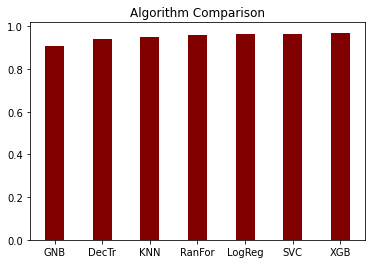

In [ ]:
plt.bar(Results.index, Results, color='maroon', width =0.4)

plt.title('Algorithm Comparison')
plt.show()

### Model Deployement

In [ ]:
SS=StandardScaler()
def scaler(sample):
    return SS.transform(sample)

In [ ]:
B_models=[RanFor,LogReg,SVC,XGB]
B_accro=['RanFor','LogReg','SVC','XGB']
B_Models=dict(zip(B_accro, B_models))


for name,model in B_Models.items():
    if name=='LogReg' or name=='KNN' or name=='SVC':
        model.fit(SS.fit_transform(X_train),y_train)
    else:
        model.fit(X_train,y_train)

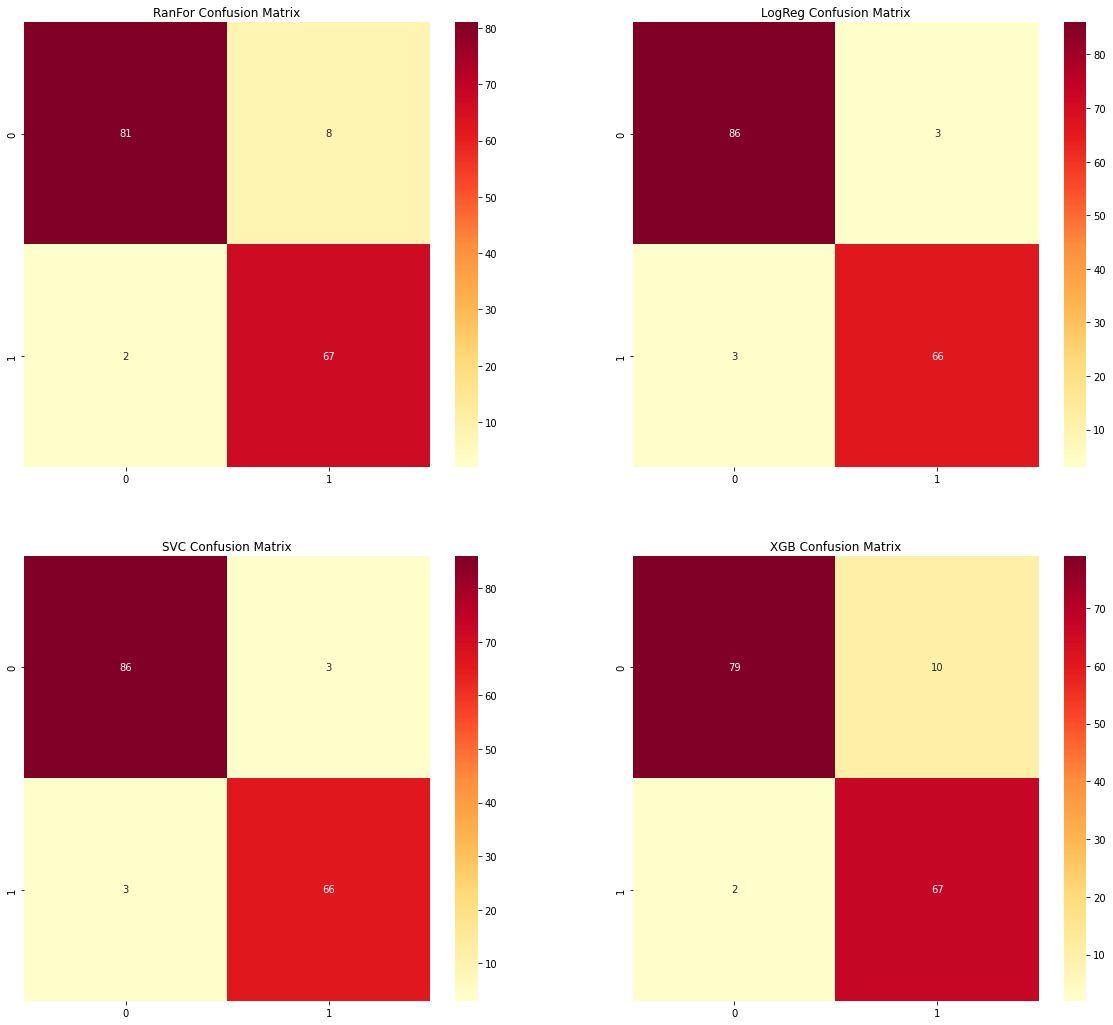

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(20, 18))
p=0
for name, model in B_Models.items():
    if name=='LogReg' or name=='KNN' or name=='SVC':
        prediction=model.predict(scaler(X_test))
    else:
        prediction=model.predict(X_test)
    cm = confusion_matrix(y_test,prediction)
    
    p+=1
    plt.subplot(2, 2, p )
    plt.title(label=name+" Confusion Matrix")
    sns.heatmap(cm,annot=True,fmt="d",cmap='YlOrRd')

In [ ]:
for name, model in B_Models.items():
    if name=='LogReg' or name=='KNN' or name=='SVC':
        prediction=model.predict(scaler(X_test))
    else:
        prediction=model.predict(X_test)
    print('-------------------','Model ',name,'-------------------')
    print( classification_report(y_test, prediction) )
    print( '------------------','Accuracy =',round(accuracy_score(y_test, prediction),3)*100,'------------------')
    print('\n\n\n')

------------------- Model  RanFor -------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        89
           1       0.89      0.97      0.93        69

    accuracy                           0.94       158
   macro avg       0.93      0.94      0.94       158
weighted avg       0.94      0.94      0.94       158

------------------ Accuracy = 93.7 ------------------




------------------- Model  LogReg -------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.96      0.96      0.96        69

    accuracy                           0.96       158
   macro avg       0.96      0.96      0.96       158
weighted avg       0.96      0.96      0.96       158

------------------ Accuracy = 96.2 ------------------




------------------- Model  SVC -------------------
              precision    recall  f1-score   support

           0    

In [ ]:
def model_metrics(name,model):
    if name=='LogReg' or name=='KNN' or name=='SVC':
        prediction=model.predict(scaler(X_test))
    else:
        prediction=model.predict(X_test)
    accuracy=accuracy_score(prediction,y_test)
    f1=f1_score(prediction,y_test)
    precision=precision_score(prediction,y_test)
    recall=recall_score(prediction,y_test)

    result_dict=pd.DataFrame({"Values":[accuracy,f1,precision,recall],
                              "Metrics":["Accuracy","F1","Precision","Recall"]})
    return result_dict

model_metrics('LogReg',LogReg)

,Values,Metrics
0,0.962025,Accuracy
1,0.956522,F1
2,0.956522,Precision
3,0.956522,Recall


In [ ]:
fig=make_subplots(rows=2,cols=2,subplot_titles=("Random Forest metrics","Logistic Regression metrics", "SVC metrics","XGB metrics"))
indexes=[(1,1),(1,2),(2,1),(2,2)]
p=0
for name, model in B_Models.items():
    results=model_metrics(name,model)
    fig.add_trace(go.Bar(x=[round(i,5) for i in results["Values"]],
                         y=results["Metrics"],
                         text=[round(i,5) for i in results["Values"]],
                         orientation="h",
                         textposition="inside",
                         marker=dict(color=["indianred","firebrick","skyblue","plum"],line_color="beige",line_width=1.5)),
                  row=indexes[p][0],
                  col=indexes[p][1] )
    p+=1
    fig.update_layout(template='seaborn',showlegend=False)
    
    
fig.show(renderer="colab")

In [ ]:
def predictor(input_data):
    data=pd.DataFrame([input_data])
    data.columns=X_test.columns
    prediction={}
    for name,model in B_Models.items():
        if name=='LogReg' or name=='KNN' or name=='SVC':
            prediction[name]=model.predict(scaler(data))[0]
        else:
            prediction[name]=model.predict(data)[0]
    for value in prediction.values():
        if value==1:
            value="Patient Have Malignant Breast Cancer"
        else:
            value="Patient Only Have Begnin Breast Cancer"
            
    return prediction

In [ ]:
sample=[17.03,22.85,0.047,0.1232,0.109,0.172,0.0578,0.2786,0.5906,0.004117,0.015,0.02975,0.009753,0.01295,0.002436,0.1263,0.2666,0.429,0.1535,0.2842,0.08225]

In [ ]:
predictor(sample)

{'RanFor': 1, 'LogReg': 1, 'SVC': 1, 'XGB': 1}

In [ ]:
print("THE END")

THE END


In [ ]:
LogReg

LogisticRegression(random_state=6, solver='liblinear')

In [ ]:
import pickle as pkl

In [ ]:
file_name = "log_regression.pkl"
with open(file_name, "wb") as f:
  pkl.dump(LogReg, f)